In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from torch.optim import Adam
from torch.utils.data import TensorDataset, DataLoader

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

In [3]:
X, y = make_regression(
    n_samples=10000,
    n_features=10,
    random_state=42,
    noise=0.10
)

In [4]:
X.shape

(100000, 10)

In [5]:
# As features ja estão normalizadas
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

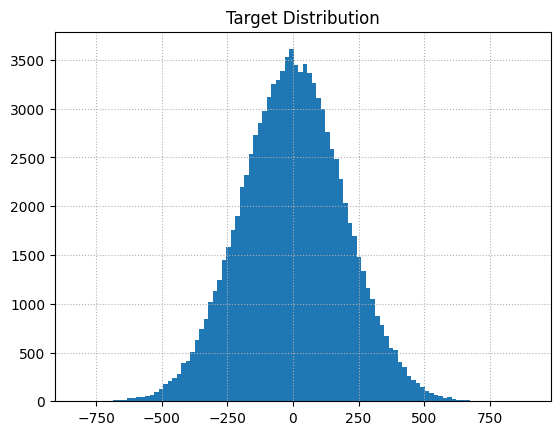

In [6]:
plt.hist(y, bins=100)
plt.grid(True, linestyle=':')
plt.title('Target Distribution');

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

In [8]:
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

In [9]:
train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_dataset)

In [10]:
class RegressionMLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(10, 16)
        self.fc2 = nn.Linear(16, 4)
        self.fc3 = nn.Linear(4, 1)
        self.relu = nn.ReLU()
        
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [11]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [12]:
model = RegressionMLP().to(device)

In [13]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)
criterion = torch.nn.MSELoss()

In [14]:
EPOCHS = 300
loss_history = []

In [15]:
optimizer.zero_grad(set_to_none=True)
for epoch in range(EPOCHS):
    epoch_loss = 0.0  # Inicializa a loss para a época atual

    for features, labels in train_dataloader:
        # zera os gradientes:
        features, labels = features.to(device), labels.to(device)
        optimizer.zero_grad()
        
        # predict do modelo:
        outputs = model(features)
        
        # calcula a loss:
        loss = criterion(outputs.view(-1), labels)
        
        # backpropagation
        loss.backward()
        
        # updates weights and biases
        optimizer.step()

        epoch_loss += loss.item()

    epoch_loss /= len(train_dataloader)
    loss_history.append(epoch_loss)
    if (epoch + 1) % 10 == 0:
        print(f'Época [{epoch + 1}/{EPOCHS}] - Loss: {epoch_loss:.4f}')

Época [10/300] - Loss: 13.7973
Época [20/300] - Loss: 9.6750
Época [30/300] - Loss: 11.5199
Época [40/300] - Loss: 3.9705
Época [50/300] - Loss: 7.2535
Época [60/300] - Loss: 12.2716
Época [70/300] - Loss: 7.2463
Época [80/300] - Loss: 7.5393
Época [90/300] - Loss: 5.3938
Época [100/300] - Loss: 4.4488
Época [110/300] - Loss: 5.0309
Época [120/300] - Loss: 6.0985
Época [130/300] - Loss: 6.9640
Época [140/300] - Loss: 5.9441
Época [150/300] - Loss: 4.7287
Época [160/300] - Loss: 5.9472
Época [170/300] - Loss: 3.7426
Época [180/300] - Loss: 3.9842
Época [190/300] - Loss: 4.5709
Época [200/300] - Loss: 3.0571
Época [210/300] - Loss: 4.2882
Época [220/300] - Loss: 4.5445
Época [230/300] - Loss: 6.4940
Época [240/300] - Loss: 4.5966
Época [250/300] - Loss: 4.1719
Época [260/300] - Loss: 4.4041
Época [270/300] - Loss: 5.6721
Época [280/300] - Loss: 4.5256
Época [290/300] - Loss: 4.1663
Época [300/300] - Loss: 3.6638


In [29]:
y_pred = []
y_true = []

with torch.no_grad():
    model.eval()
    for features, labels in test_dataloader:
        # remove a dimensão adicional
        features, labels = features.to(device), labels.to(device)
        predict = model(features)
        y_pred.append(predict.item())
        y_true.append(labels.item())

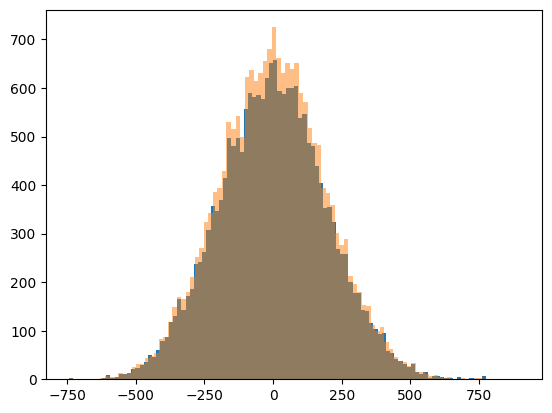

In [34]:
plt.hist(y_pred, bins=100)
plt.hist(y_true, bins=100, alpha=0.5);

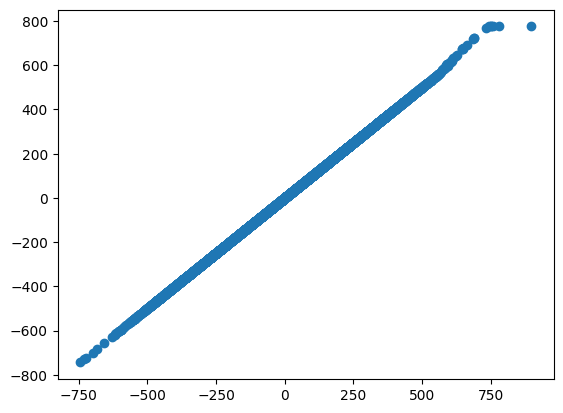

In [35]:
plt.scatter(y_true, y_pred)